<a href="https://colab.research.google.com/github/Josephnyingi/Clime/blob/main/Clime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Defining the Research Problem**

##Specifying the Research Question

The goal of this analysis is to accurately forecast temperature and rainfall data using the Prophet model.

This information can be used to support decision-making processes in various sectors, including agriculture, disaster management, and urban planning.

Specifically, the aim is to develop a robust predictive model that provides reliable weather forecasts over a given period.

##Defining the Metric of Success

The project will be considered successful when we achieve the following objectives:

1. Prepare and preprocess weather datasets for analysis.

2. Train and validate the Prophet model to forecast temperature and rainfall.

3. Evaluate model performance using key metrics such as RMSE (Root Mean Square Error) and R-squared (R²).

4. Generate and visualize predictions alongside actual test data for interpretation and decision-making.

##Understanding the Context

Weather forecasting is critical in various domains, particularly in agriculture and disaster management, where reliable predictions can save resources and lives. The analysis uses historical weather data consisting of temperature and rainfall, and the results will inform strategies for managing climate-related challenges.

Prophet is a time-series forecasting tool developed by Facebook that accommodates missing data, trend changes, and seasonality, making it particularly suitable for weather-related data. This project focuses on using Prophet to predict temperature and rainfall, two vital variables that significantly influence planning and decision-making.

The analysis emphasizes creating accurate forecasts by leveraging historical data and testing the model's performance against new test data. The ultimate goal is to provide actionable insights that stakeholders can rely on for climate adaptation and mitigation.

#**Recording the Experimental Design**

###1. Load and Prepare the Datasets
* Load historical weather data (temperature
and rainfall).
* Handle missing values and format the dataset for analysis.

###2. Train the Prophet Models
* Train one Prophet model for temperature forecasting and another for rainfall forecasting.

* Save the trained models using Python's pickle module for future use.

###3. Evaluate the Models
* Use test data to evaluate the model's performance by calculating RMSE and

* Compare predicted values with actual values to assess forecast accuracy.
Visualize the Results

###4. Plot forecasts for temperature and rainfall, including actual vs. predicted values.
* Analyze deviations and patterns to refine insights.

###5. Generate Insights

* Interpret the forecast results to provide actionable recommendations based on predicted trends in temperature and rainfall.

#**Data Relevance**

This project uses historical weather data containing temperature and rainfall observations. The dataset includes:

* Variables: Date (`ds`), temperature (`y` for temperature model), and rainfall (`y` for rainfall model).

* Timeframe: Data spans several years to capture seasonal and yearly trends.


The analysis also incorporates an external test dataset to evaluate model performance. This test data ensures that the forecasts generated are reliable and applicable in real-world scenarios.


#**1. Import necessary Libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import pickle


#**2. Load dataset**

In [30]:
weather = pd.read_csv("/content/Historical.csv", index_col= "DATE")
weather.head()
#Date is used as our Index (ID)

,temperature,rain
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5


#**3. Handle the missing values**

In [31]:
# Get rid of missing values
# Calculate null percentage
null_percentage = weather.isnull().sum()/weather.shape[0]
null_percentage




,0
temperature,0.0
rain,0.0


The data has no null values

In [32]:
# Checking data type
# we want to make sure all the values are of same data type
weather.dtypes



,0
temperature,float64
rain,float64


In [33]:
#Check index dtype correct row type
weather.index

Index(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08',
       '2022-12-09', '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
       ...
       '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12', '2024-12-13',
       '2024-12-14', '2024-12-15', '2024-12-16', '2024-12-17', '2024-12-18'],
      dtype='object', name='DATE', length=746)

In [34]:
# convert  indexdtype from object to datetime
weather.index = pd.to_datetime(weather.index)
weather.index


DatetimeIndex(['2022-12-04', '2022-12-05', '2022-12-06', '2022-12-07',
               '2022-12-08', '2022-12-09', '2022-12-10', '2022-12-11',
               '2022-12-12', '2022-12-13',
               ...
               '2024-12-09', '2024-12-10', '2024-12-11', '2024-12-12',
               '2024-12-13', '2024-12-14', '2024-12-15', '2024-12-16',
               '2024-12-17', '2024-12-18'],
              dtype='datetime64[ns]', name='DATE', length=746, freq=None)

In [35]:
# Getting the year component our date
weather.index.year


Index([2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
       ...
       2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024, 2024],
      dtype='int32', name='DATE', length=746)

In [36]:
# checking for gaps in data
weather.index.year.value_counts().sort_index()


,count
DATE,
2022,28
2023,365
2024,353


In 2022, the data downloaded was from early days December 28 days to the end of that year. However, there are gaps in 2024, as the data was not available towards the end of December that year.

# **4. Exploratory Data Analysis (EDA)**

<Axes: xlabel='DATE'>

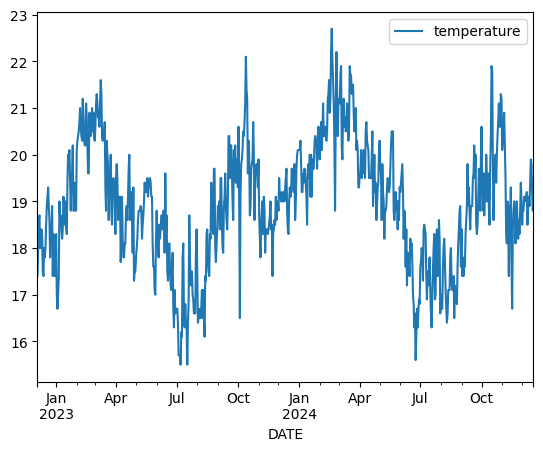

In [37]:
# Plotting Temperature column
weather.plot(y="temperature")


<Axes: xlabel='DATE'>

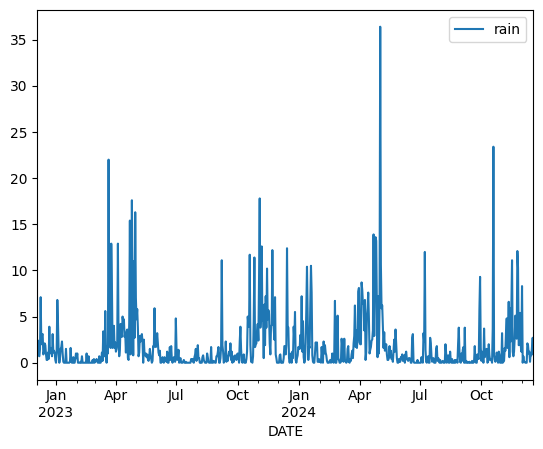

In [38]:
# Plotting the Rain column
weather.plot(y="rain")


In [39]:
weather

,temperature,rain
DATE,,
2022-12-04,17.4,1.5
2022-12-05,18.0,2.4
2022-12-06,18.6,0.8
2022-12-07,18.7,0.7
2022-12-08,18.0,1.5
...,...,...
2024-12-14,19.9,1.0
2024-12-15,19.8,0.8
2024-12-16,19.2,1.7


#**5. Prepare data for Prophet**

**Why prophet? ** *It works best with time series that have strong seasonal effects and several seasons of historical data. it is robust to missing data and shifts in the trend, and typically handles outliers as well*

We create and use a new `Prophet` object to train the model.
Any settings to the forecasting procedure are passed into the constructor.
Then call its `fit` method and pass in the historical dataframe.

The input to Prophet is always dataframe with two columns; `ds` and` y `.
where `ds` is the datestamp and `y` is the numeric measurement we wish to forecast ( for our case is Temperature and Rain)





In [40]:
# Rename the index 'DATE' to 'ds' and reset the index
weather = weather.rename_axis('ds').reset_index()
weather.head()




,ds,temperature,rain
0,2022-12-04,17.4,1.5
1,2022-12-05,18.0,2.4
2,2022-12-06,18.6,0.8
3,2022-12-07,18.7,0.7
4,2022-12-08,18.0,1.5


In [41]:
from os import rename
# seperate data for temperature and rain
temp = weather[['ds', 'temperature']].rename(columns={'temperature': 'y'})
rain = weather[['ds', 'rain']].rename(columns={'rain': 'y'})
#temp.head()
rain.head()

,ds,y
0,2022-12-04,1.5
1,2022-12-05,2.4
2,2022-12-06,0.8
3,2022-12-07,0.7
4,2022-12-08,1.5


#**6. Train the Prophet model**


In [42]:
# Temperature model and add country holidays
temp_model = Prophet()
temp_model.add_country_holidays(country_name='KE')
temp_model.fit(temp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwcoobq5/t5ijpmr0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwcoobq5/eox65vr8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63660', 'data', 'file=/tmp/tmpbwcoobq5/t5ijpmr0.json', 'init=/tmp/tmpbwcoobq5/eox65vr8.json', 'output', 'file=/tmp/tmpbwcoobq5/prophet_modelpxmbpczr/prophet_model-20250120054812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [43]:
# Rainfall model and add country holidays
rain_model = Prophet()
rain_model.add_country_holidays(country_name='KE')
rain_model.fit(rain)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwcoobq5/9z0es94a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwcoobq5/vcwpp2mc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90723', 'data', 'file=/tmp/tmpbwcoobq5/9z0es94a.json', 'init=/tmp/tmpbwcoobq5/vcwpp2mc.json', 'output', 'file=/tmp/tmpbwcoobq5/prophet_modelg0ws8jhl/prophet_model-20250120054813.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:48:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:48:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#**7. Save the trained models using pickle**

In [44]:
with open('temp_model.pkl', 'wb') as f:
    pickle.dump(temp_model, f)

with open('rain_model.pkl', 'wb') as f:
    pickle.dump(rain_model, f)

print("Models have been saved as 'temp_model.pkl' and 'rain_model.pkl'!")



Models have been saved as 'temp_model.pkl' and 'rain_model.pkl'!


#**8. Reload the models**

In [45]:
with open('temp_model.pkl', 'rb') as f:
    loaded_temp_model = pickle.load(f)

with open('rain_model.pkl', 'rb') as f:
    loaded_rain_model = pickle.load(f)

#**9. Create future dataframe and forecast using the loaded models**

Predictions are then made on a dataframe with a column `ds` containing the dates for which a prediction is to be made.

To get a suitable dataframe that extends into the future a specified number of days (183 days ) using the helper method Prophet.`make_future_dataframe`.

By default include the dates from the history, so we will see the model fit as well.

In [46]:
#Define forecast horizon ( 183 days)
forecast_horizon = 183
#Temperature foracast
future_temp = loaded_temp_model.make_future_dataframe(periods=forecast_horizon, include_history=True)
temp_forecast = loaded_temp_model.predict(future_temp)
#Rainfall forecast
future_rain = loaded_rain_model.make_future_dataframe(periods=forecast_horizon, include_history=True)
rain_forecast = loaded_rain_model.predict(future_rain)


#**10. Plot Forecasts**

a. Temperature plot

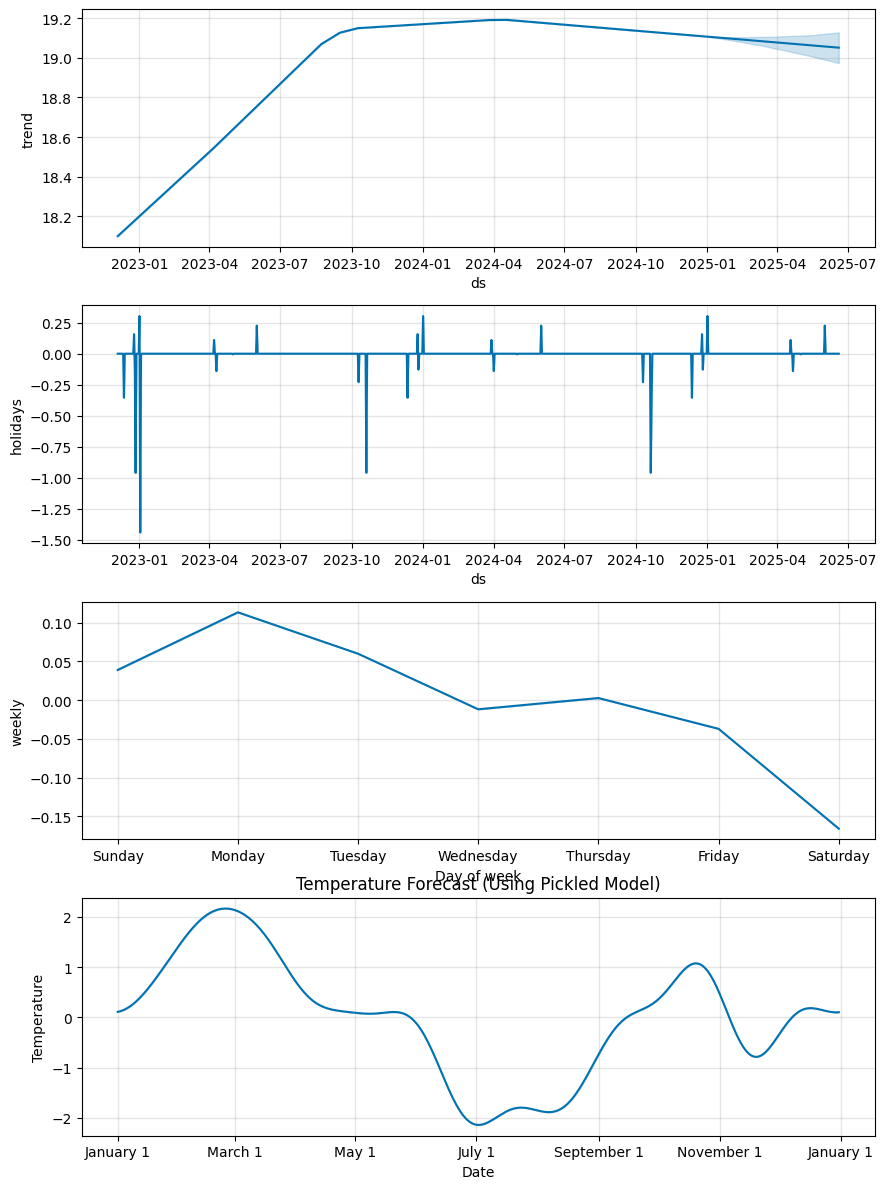

In [47]:
# Temperature plot
loaded_temp_model.plot_components(temp_forecast)
plt.title('Temperature Forecast (Using Pickled Model)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

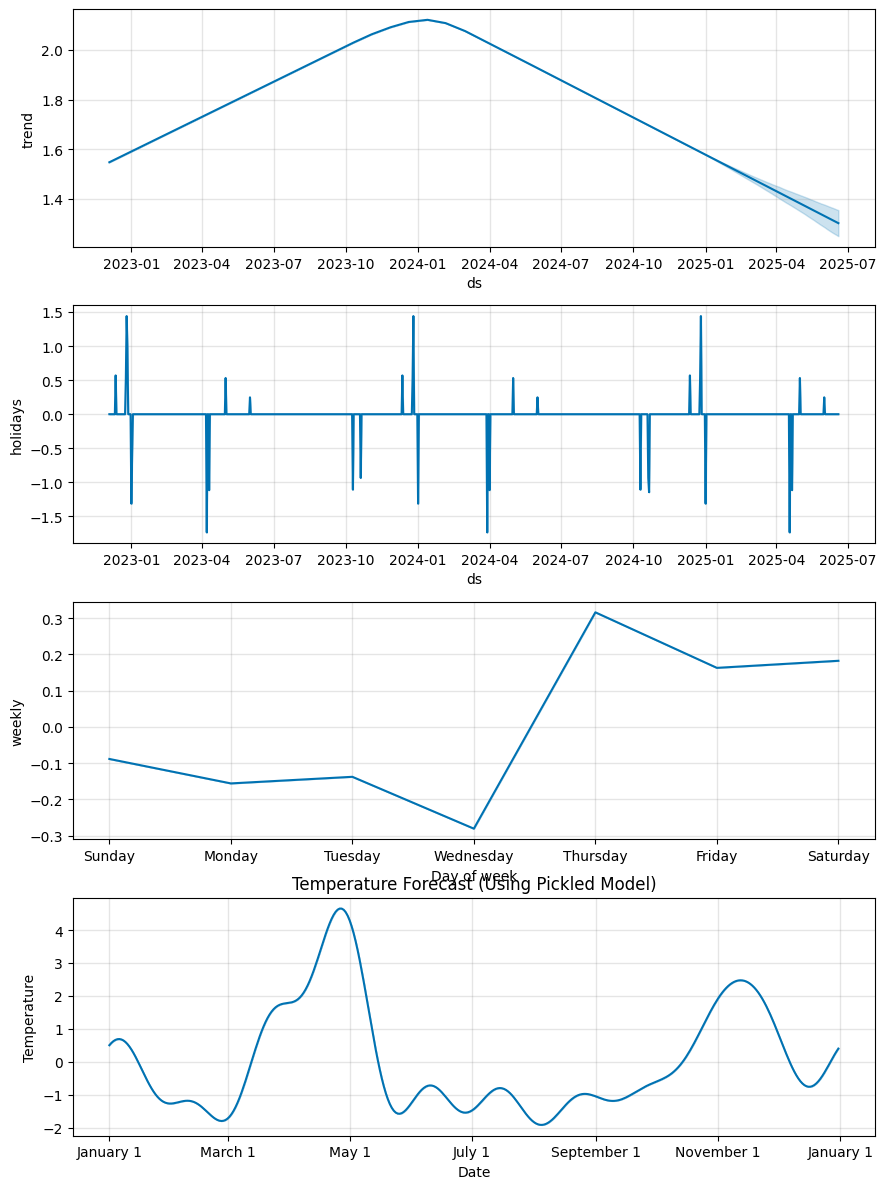

In [48]:
# Rainfall plot
loaded_rain_model.plot_components(rain_forecast)
plt.title('Temperature Forecast (Using Pickled Model)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


#**11. Evaluate the Model (test data)**

In [49]:
# load the test data
test_data = pd.read_csv('/content/Weather_Test.csv', index_col= "DATE")
test_data.head()


# Rename the index 'DATE' to 'ds' and reset the index

test_data = test_data.rename_axis('ds').reset_index()
test_data.tail()



,ds,temperature,rain
20,2025-01-08,19.0,0.3
21,2025-01-09,18.9,1.0
22,2025-01-10,18.4,1.1
23,2025-01-11,18.9,0.2
24,2025-01-12,19.8,0.3


In [50]:
# Create a test temp from test data
test_temp = test_data[['ds', 'temperature']].rename(columns={'temperature': 'y'})
test_temp.head()

,ds,y
0,2024-12-19,17.8
1,2024-12-20,18.5
2,2024-12-21,17.7
3,2024-12-22,18.0
4,2024-12-23,18.4


a. Evaluate for temperature

In [51]:
# Create a test temp from test data
test_temp = test_data[['ds', 'temperature']].rename(columns={'temperature': 'y'})
test_temp.head()

# create temp_pred_filtered dataframe from temp forecast dates '2024-12-19' to ' 	2025-01-12'
# to match with same dates as test data (Actual dates)
# temp pred filtered is from prediction model is only a forecast.
temp_pred_filtered = temp_forecast[['ds', 'yhat']][temp_forecast['ds'].between('2024-12-19', '2025-01-12')]
temp_pred_filtered.tail()

# Convert 'ds' column to datetime in both DataFrames if necessary
test_temp['ds'] = pd.to_datetime(test_temp['ds'])
temp_pred_filtered['ds'] = pd.to_datetime(temp_pred_filtered['ds'])

# merge temperature test data and temp_pred_filtered
temp_merged = pd.merge(test_temp, temp_pred_filtered, on='ds', how='inner')
temp_merged.tail()




,ds,y,yhat
20,2025-01-08,19.0,19.334813
21,2025-01-09,18.9,19.380129
22,2025-01-10,18.4,19.374014
23,2025-01-11,18.9,19.281482
24,2025-01-12,19.8,19.524786


In [52]:
# Calculate evaluation metrics for Temperature
from sklearn.metrics import mean_absolute_error, r2_score
# RMSE
rmse = np.sqrt(mean_squared_error(temp_merged['y'], temp_merged['yhat']))
# R-squared
r2 = r2_score(temp_merged['y'], temp_merged['yhat'])

# Print metrics with value-specific explanations
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f" - On average, the predictions deviate from the actual values by approximately {rmse:.2f} units (e.g., degrees Celsius).")

print(f"R-squared (R²): {r2:.2f}")
if r2 >= 0.9:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates an excellent fit.")
elif r2 >= 0.7:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates a good fit.")
elif r2 >= 0.5:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates a moderate fit.")
else:
    print(f" - The model explains only {r2 * 100:.1f}% of the variance in the data, which suggests it may not fit well.")


Root Mean Square Error (RMSE): 0.85
 - On average, the predictions deviate from the actual values by approximately 0.85 units (e.g., degrees Celsius).
R-squared (R²): -2.14
 - The model explains only -213.8% of the variance in the data, which suggests it may not fit well.


b. evaluate for rain

In [53]:
# Create a test rain from test data
test_rain = test_data[['ds', 'rain']].rename(columns={'rain': 'y'})
test_rain.head()

# create temp_pred_filtered dataframe from temp forecast dates '2024-12-19' to ' 	2025-01-12'
# to match with same dates as test data (Actual dates)
# temp pred filtered is from prediction model is only a forecast.
rain_pred_filtered = rain_forecast[['ds', 'yhat']][rain_forecast['ds'].between('2024-12-19', '2025-01-12')]
rain_pred_filtered.tail()

# Convert 'ds' column to datetime in both DataFrames if necessary
test_rain['ds'] = pd.to_datetime(test_rain['ds'])
rain_pred_filtered['ds'] = pd.to_datetime(rain_pred_filtered['ds'])

# merge temperature test data and temp_pred_filtered
rain_merged = pd.merge(test_rain, rain_pred_filtered, on='ds', how='inner')
rain_merged.tail()


,ds,y,yhat
20,2025-01-08,0.3,1.932443
21,2025-01-09,1.0,2.481207
22,2025-01-10,1.1,2.263885
23,2025-01-11,0.2,2.204571
24,2025-01-12,0.3,1.841634


In [54]:
# Calculate evaluation metrics for Rain
from sklearn.metrics import mean_absolute_error, r2_score
# RMSE
rmse = np.sqrt(mean_squared_error(rain_merged['y'], rain_merged['yhat']))
# R-squared
r2 = r2_score(rain_merged['y'], rain_merged['yhat'])

# Print metrics with value-specific explanations
print(f"Root Mean Square Error (RMSE): {rmse:.2f}")
print(f" - On average, the predictions deviate from the actual values by approximately {rmse:.2f} units (e.g., degrees Celsius).")

print(f"R-squared (R²): {r2:.2f}")
if r2 >= 0.9:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates an excellent fit.")
elif r2 >= 0.7:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates a good fit.")
elif r2 >= 0.5:
    print(f" - The model explains {r2 * 100:.1f}% of the variance in the data, which indicates a moderate fit.")
else:
    print(f" - The model explains only {r2 * 100:.1f}% of the variance in the data, which suggests it may not fit well.")



Root Mean Square Error (RMSE): 3.79
 - On average, the predictions deviate from the actual values by approximately 3.79 units (e.g., degrees Celsius).
R-squared (R²): -0.18
 - The model explains only -18.0% of the variance in the data, which suggests it may not fit well.


#**12. Plot the actual vs predicted**

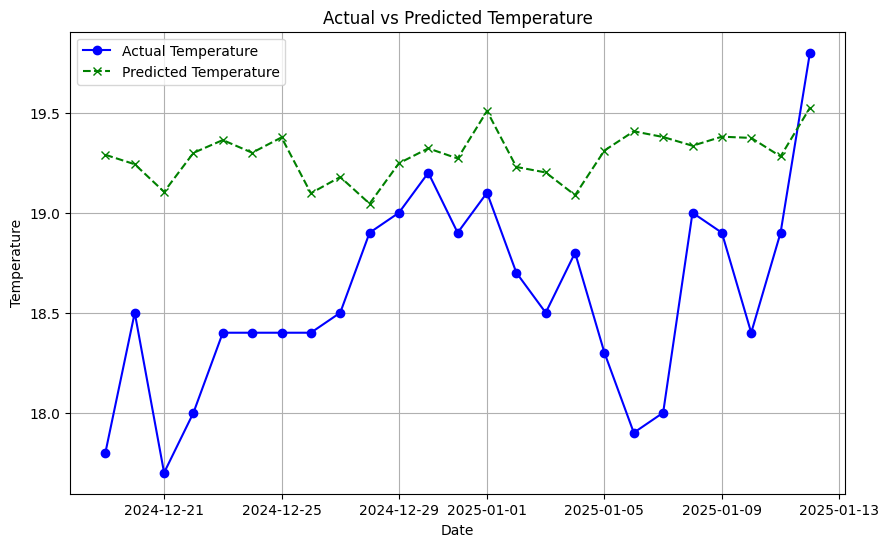

In [55]:
# Plot actual vs predicted
# Temperature
plt.figure(figsize=(10, 6))
plt.plot(temp_merged['ds'], temp_merged['y'], label='Actual Temperature', color='blue', marker='o')
plt.plot(temp_merged['ds'], temp_merged['yhat'], label='Predicted Temperature', color='green', linestyle='dashed', marker='x')
plt.legend()
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.grid()
plt.show()

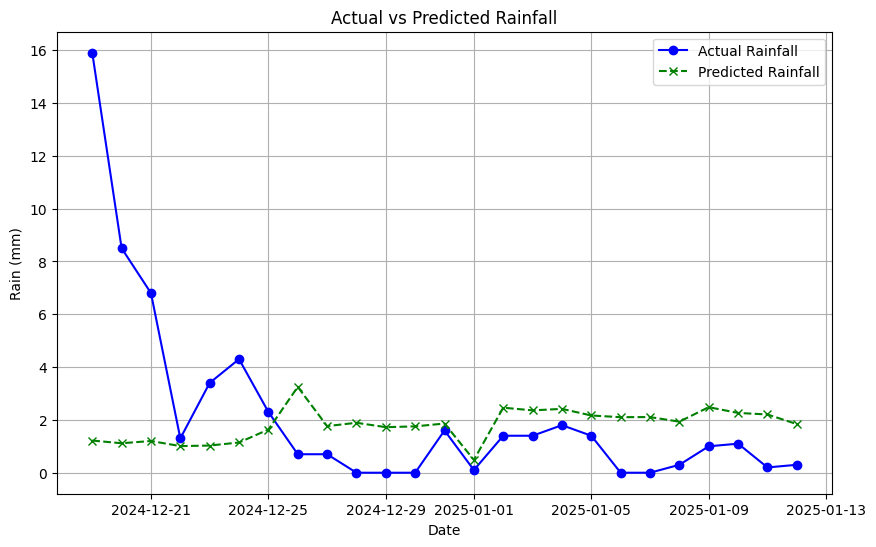

In [56]:
# Rainfall
plt.figure(figsize=(10, 6))
plt.plot(rain_merged['ds'], rain_merged['y'], label='Actual Rainfall', color='blue', marker='o')
plt.plot(rain_merged['ds'], rain_merged['yhat'], label='Predicted Rainfall', color='green', linestyle='dashed', marker='x')
plt.legend()
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.grid()
plt.show()